In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
#from scipy import stats

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
data = pd.read_csv('../ml_data/housing.data',
                  sep= ' +',
                  engine='python',
                  header=None,
                  names=cols)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [8]:
IQR = Q3 - Q1

In [10]:
outlier_condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 +1.5 * IQR)))

In [11]:
data = data[~outlier_condition.any(axis=1)]

In [13]:
X = data['LSTAT'].values.reshape(-1,1)

In [14]:
y = data['MEDV'].values.reshape(-1,1)

In [15]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
X = scaler.transform(X)

In [20]:
scaler.fit(y)

StandardScaler()

In [21]:
y = scaler.transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_train = lr.predict(X_train)

In [26]:
y_pred_test = lr.predict(X_test)

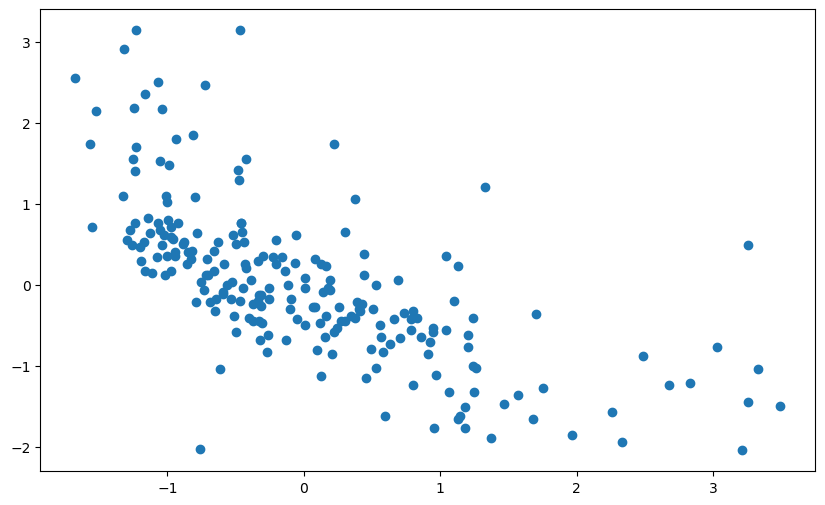

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train)
plt.show()

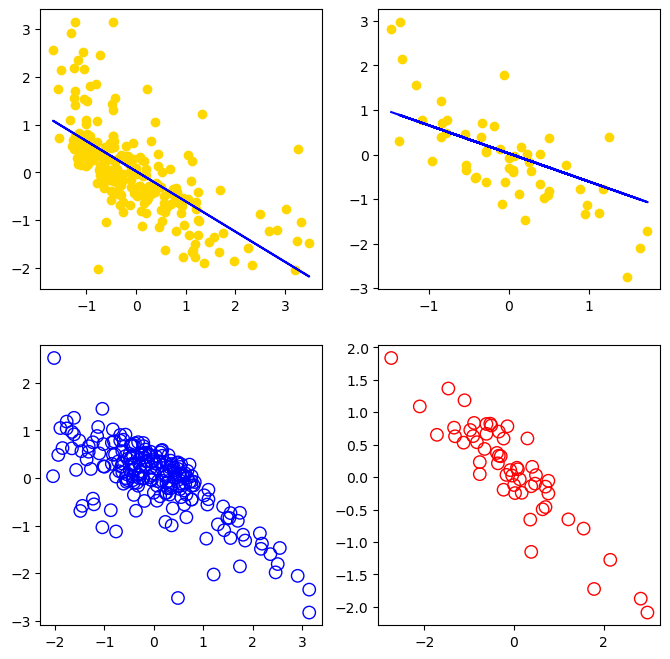

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0,0].scatter(X_train, y_train, color = 'gold')
ax[0,0].plot(X_train, y_pred_train, color = 'blue')
ax[0,1].scatter(X_test, y_test, color = 'gold')
ax[0,1].plot(X_test, y_pred_test, color = 'blue')
ax[1,0].scatter(y_train, y_pred_train - y_train, s=80, 
          facecolors='none', edgecolors='b')
ax[1,1].scatter(y_test,  y_pred_test  - y_test,  s=80, 
          facecolors='none', edgecolors='r')